In [6]:
# 1. Загрузить набор данных из репозитория. Свой выбор данных  согласовать с преподавателем.
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

df = pd.read_csv("./data/global_cancer_patients_2015_2024.csv")

print(df.info())

df = df.drop_duplicates()
df = df.drop("Patient_ID", axis=1)
df = df.drop("Treatment_Cost_USD", axis=1)
df = df.drop("Year", axis=1)

df.head()

# 5. Отобрать и определить признаки, которые будут использоваться для построения моделей.

important_feat = [
    "Age",
    "Gender",
    "Country_Region",
    "Genetic_Risk",
    "Air_Pollution",
    "Alcohol_Use",
    "Smoking",
    "Obesity_Level",
    "Cancer_Type",
    "Cancer_Stage",
]

numeric_columns = [
    "Age",
    "Genetic_Risk",
    "Air_Pollution",
    "Alcohol_Use",
    "Smoking",
    "Obesity_Level",
    "Survival_Years",
    "Target_Severity_Score",
]

categorical_columns = [
    "Gender",
    "Country_Region",
    # "Cancer_Type",
    "Cancer_Stage",
]

target = "Cancer_Type"

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

,Age,Gender,Country_Region,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score
0,71,Male,UK,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92
1,34,Male,China,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65
2,80,Male,Pakistan,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84
3,40,Male,UK,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12
4,43,Female,Brazil,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62


In [7]:
y = df['Cancer_Type']

X = df.drop(columns=['Cancer_Type'])

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_columns),
    ("cat", OneHotEncoder(), categorical_columns)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": SVC(kernel='linear'),
    "Perceptron": Perceptron()
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)
    print(f"{name} accuracy: {pipe.score(X_test, y_test):.3f}")

Logistic Regression accuracy: 0.123
Linear SVM accuracy: 0.127
Perceptron accuracy: 0.124


In [9]:
poly_svm = make_pipeline(preprocessor, SVC(kernel='poly', degree=3))
rbf_svm = make_pipeline(preprocessor, SVC(kernel='rbf', gamma='scale'))

poly_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

print("Polynomial SVM accuracy:", poly_svm.score(X_test, y_test))
print("RBF SVM accuracy:", rbf_svm.score(X_test, y_test))


Polynomial SVM accuracy: 0.1265
RBF SVM accuracy: 0.1276


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 0.1, 0.01],
    'svc__kernel': ['rbf']
}

pipe = make_pipeline(preprocessor, SVC())
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best SVM params:", grid.best_params_)
print("Best SVM accuracy:", grid.score(X_test, y_test))


Best SVM params: {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best SVM accuracy: 0.1288


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

      Breast       0.00      0.00      0.00      1238
    Cervical       0.00      0.00      0.00      1244
       Colon       0.13      0.88      0.22      1275
    Leukemia       0.00      0.00      0.00      1253
       Liver       0.12      0.06      0.08      1250
        Lung       0.00      0.00      0.00      1232
    Prostate       0.13      0.02      0.04      1262
        Skin       0.14      0.05      0.07      1246

    accuracy                           0.13     10000
   macro avg       0.07      0.13      0.05     10000
weighted avg       0.07      0.13      0.05     10000



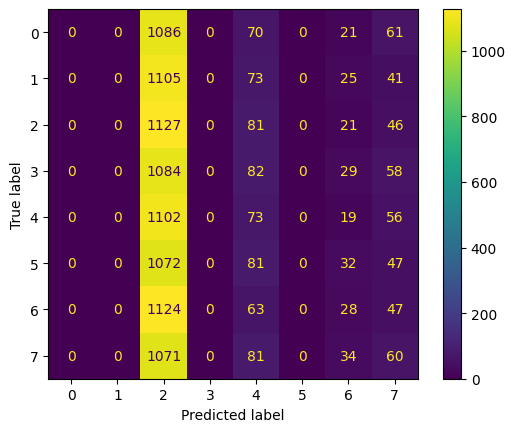

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize

if y.nunique() == 2:
    y_score = best_model.decision_function(X_test)
    RocCurveDisplay.from_predictions(y_test, y_score)
    print("ROC AUC:", roc_auc_score(y_test, y_score))

# Данные линейно не разделимы


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, f1_score,
    roc_auc_score, RocCurveDisplay
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "Linear SVM": make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True)),
    "Perceptron": make_pipeline(StandardScaler(), Perceptron())
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred, average='weighted'),  # weighted для мультикласса
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "report": classification_report(y_test, y_pred)
    }

for name, res in results.items():
    print(f"--- {name} ---")
    print(f"Accuracy: {res['accuracy']:.3f}")
    print(f"F1-score: {res['f1']:.3f}")
    print("Classification Report:")
    print(res['report'])
    print("Confusion Matrix:")
    print(res['conf_matrix'])
    print()

fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
for ax, (name, res) in zip(axes, results.items()):
    cm = res['conf_matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False) # type: ignore
    ax.set_title(f"{name} Confusion Matrix")
plt.tight_layout()
plt.show()

if len(np.unique(y_test)) == 2:
    plt.figure(figsize=(8, 6))
    for name, res in results.items():
        model = res['model']
        y_score = model.predict_proba(X_test)[:, 1]
        RocCurveDisplay.from_predictions(y_test, y_score, name=name)
    plt.title("ROC Curves")
    plt.show()

logreg_no_scaling = LogisticRegression(max_iter=1000)
logreg_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = logreg_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

acc_with_scaling = results["Logistic Regression"]["accuracy"]

print(f"Logistic Regression accuracy без масштабирования: {acc_no_scaling:.3f}")
print(f"Logistic Regression accuracy с масштабированием: {acc_with_scaling:.3f}")

from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=1000), # type: ignore
    X_train, y_train,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="accuracy"
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.semilogx(param_range, train_mean, label="Training score", color="r")
plt.semilogx(param_range, test_mean, label="Cross-validation score", color="g")
plt.xlabel("Parameter C (Regularization strength)")
plt.ylabel("Accuracy")
plt.title("Validation Curve for Logistic Regression")
plt.legend(loc="best")
plt.show()

ValueError: could not convert string to float: 'Other'